<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, Analysis and Security</h1>

<h2 align='center'> Sample Questions - Week 4 Labtest</h2>

*****

The following is designed to provide you with an indication of the type of questions that will be asked in the Week 4 Labtest. Note that you will **not** be answering the same questions in the Labtest. You are welcome to discuss solutions with friends and on the forums, however the exam will be an individual assessment.
****

In [1]:
# Module and Data Imports, make sure you run this first!
import numpy as np
import pandas as pd
from scipy import stats
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")


poke_data = pd.read_csv('./data/pokemon.csv')
car_data = pd.read_csv('./data/automobile.csv')

## Sample #1: Gotta Catch 'em All!
Now that we've got you motivated to attempt this question with the title itself, let's get on with it! You've been given a dataset with all the defining characteristics of various pokémon (a.k.a: an incomplete **Pokédex**). You need to find and list the pokémon (and its HP) that has the highest HP (Hit Points) for each Type combination (`Type 1` and `Type 2` both). Because let's face it, that is an important data science question if you need to catch 'em all! :)

In [2]:
# TODO: Finish the function such that it returns the pokemon with the highest HP for each type combination
def poke_max_hp(df_pokemon):
    # Write code here
    a = poke_data.groupby(['Type 1','Type 2'])['HP'].max()

    return a


In [3]:
# Run this block to test your code
poke_max_hp(poke_data)

Type 1  Type 2  
Bug     Electric     70
        Fighting     80
        Fire         85
        Flying       86
        Ghost         1
                   ... 
Water   Ice         130
        Poison       80
        Psychic      95
        Rock        100
        Steel        84
Name: HP, Length: 136, dtype: int64

******

## Sample #2: Serious Speed vs Passionate Power
Ben and Afzal are fighting over what is a more important characteristic of a Pokemon: `Power` or `Speed`. In an attempt to resolve this conflict, you need to draw a plot to compare the distribution of values for the columns `Speed` and `HP`. In addition to this, print a tuple containing the overall mean of `Speed` and `HP` of all pokemon in the dataset. Finally, explain how looking at the mean and distribution of an attribute could help determine it's importance.

In [4]:
# TODO: Finish the function such that it prints a plot of the distribution of 'Speed' and 'HP', and prints the mean 'Speed' and 'HP' of the pokemon in the dataset
def poke_conflict_resolution(df_poke):
    # Write code here
    a = poke_data['Speed']
    b = poke_data['HP']
    c = plt.boxplot([a,b], notch =True)
    return plt.show()

In [5]:
 poke_data[['Speed','HP']].mean()

Speed    68.27750
HP       69.25875
dtype: float64

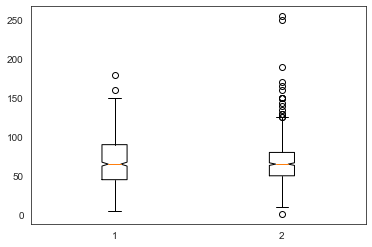

In [6]:
# Run this block to test your code
poke_conflict_resolution(poke_data)

*****

## Sample #3: Costly Cars
Extending upon our love for cars (especially the pricey ones!), we decided to have a look at the top 5 car manufacturers from the cars dataset. From the below dataset, help us return a dataset comprising of the **top 5 car manufacturers (in descending order)** along with their **average car prices**. But wait, there's a catch! You only have to do these computations on a subset of the dataset that only contains cars with the body-style `sedan` or `convertible`. Your result should look something like this -

|    _     | company       | price     |
| -------- |:-------------:| ---------:|
|    6     | car_firm 1    |  1000.000 |
|    8     | car_firm 2    |   980.000 |
|   11     | car_firm 3    |   774.333 |
|    3     | car_firm 4    |   645.000 |
|    1     | car_firm 5    |   510.666 |

In [7]:
# TODO: Finish the function so that the sedan and convertible cars are checked, and the top 5 car manufacturers along with their average car prices.
def top_5_pricey(df_cars):
    # Write code here
    sedan = car_data['body-style']=='sedan'
    con = car_data['body-style']=='convertible'
    d = car_data[sedan|con]
    c = d[['index','company','price']]
    mean = c.groupby(['company'])['price'].mean()
    e = pd.DataFrame(data=mean)
    f = e.sort_values('price', ascending=False)
    g = f[:5]
    df = g.reset_index()
    return df

In [8]:
# Run this block to test your code
top_5_pricey(car_data)

,company,price
0,porsche,37028.000000
1,jaguar,34600.000000
2,mercedes-benz,33256.000000
3,bmw,27213.333333
4,mazda,18344.000000


*****

## Sample #4: Pump up the V6
In our quest to find the perfect car to buy, we forgot analysis the popularity of **no. of cylinders in the car engine** among the various **car manufacturers**. Make a plot that shows us how many companies make a particular `num-of-cylinders` engine. You must also justify your type of plot including reasoning for clarity. Don't forget to label and title your plot!

In [14]:
# TODO: complete the below function to plot the number of companies make an engine with a particular number of cylinders

from matplotlib import cm

def plot_cyl_companies(df_cars):
# gets number of cars for each num of cylinders
    df = df_cars[['company','num-of-cylinders']].groupby('num-of-cylinders', sort=False).count()

# defines custom order of categories
    columns = ['two', 'three', 'four', 'five','six', 'eight', 'twelve']
    df.index = pd.Categorical(df.index, columns)

# applies custom arrangement
    df.sort_index(inplace=True)

    # extracts numbers
    y = df['company']

# sets colours
    colors = cm.plasma(np.arange(7)/7.)

# sets up graph
    fig = plt.figure()
    ax = fig.add_subplot(111)
# plots graph
    for i in np.arange(7):
        plt.bar(1+i,y[i],colors[i])

        # adds labels
        plt.xticks(np.arange(1,8),columns)
        ax.set(xlabel='num-of-cylinders',
               ylabel='num-of-comanies')
    return


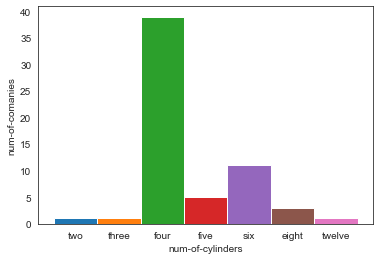

In [15]:
plot_cyl_companies(car_data)

*****

## Sample #5: Hop to the Hypotheses
Recall in Lab 3 that you learnt how to perform hypothesis testing. Luckily for you, you now have the chance to do what a student always dreams of, prove a tutor wrong. Tommy has made the claim that cars with six (6) cylinders will always have be more expensive than any other number of cylinders, regardless of any other car properties.

To check this, please perform a hypothesis test (you'll need to determine which hypothesis test is most appropriate between one-sample, independent or related) for the price based on two groups: cars which have 6 cylinders in their engine, and cars which do not have 6 cylinders in their engine. 

In [20]:
# TODO: split data and find p-value for hypothesis test
# six = car_data[car_data.loc[:,"num-of-cylinders"]=="six"].loc[:,"price"]
# other = car_data[car_data.loc[:,"num-of-cylinders"]!="six"].loc[:,"price"]
six = car_data[ (car_data['num-of-cylinders']=='six') ]
other = car_data[ (car_data['num-of-cylinders']!='six') ]
six =six['price'].dropna()
other =other['price'].dropna()
t,p = stats.ttest_ind(six, other)
print("p-value:", p)

p-value: 3.106440906993154e-06


<br>

*****


Hopefully that should help you prepare for the Labtest. Good luck!